<a href="https://colab.research.google.com/github/JOekh1122/NLP_TASK/blob/main/Copy_of_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/twitter_training.csv")


In [ ]:
df.head(20)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [ ]:
df.columns = ["id", "socialMedia", "target","text"]

In [ ]:
df.head()

,id,socialMedia,target,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df["target"].value_counts()


,count
target,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


In [ ]:
df_with_lengths = df[["text","target"]].copy()
print(df_with_lengths['target'].value_counts())

target
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [ ]:
df_with_lengths["length"] = df["text"].str.len()
print(df_with_lengths.head())


                                                text    target  length
0  I am coming to the borders and I will kill you...  Positive    51.0
1  im getting on borderlands and i will kill you ...  Positive    50.0
2  im coming on borderlands and i will murder you...  Positive    51.0
3  im getting on borderlands 2 and i will murder ...  Positive    57.0
4  im getting into borderlands and i can murder y...  Positive    53.0


Text(0.5, 1.0, 'Distribution of Tweet Lengths')

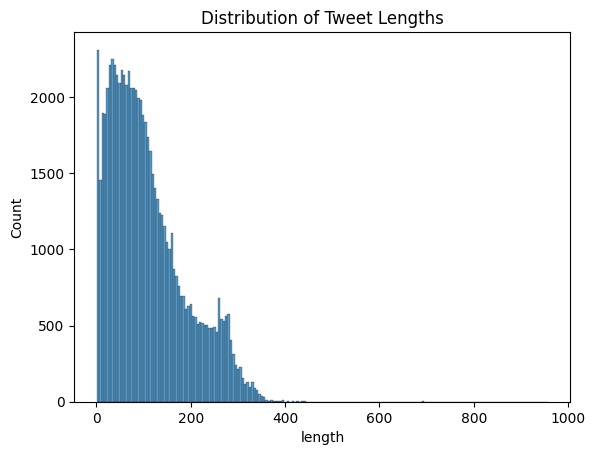

In [ ]:
sns.histplot(data=df_with_lengths, x="length")
plt.title("Distribution of Tweet Lengths")

In [ ]:
print(df.columns)


Index(['id', 'socialMedia', 'target', 'text'], dtype='object')


In [ ]:
from collections import Counter
import re

all_words = " ".join(df["text"].fillna("").astype(str)).lower()
tokens = re.findall(r'\b\w+\b', all_words)
top_tokens = Counter(tokens).most_common(20)
print(top_tokens)


[('the', 44611), ('i', 36163), ('to', 29042), ('and', 26711), ('a', 24307), ('of', 19528), ('it', 17941), ('is', 17883), ('in', 15795), ('for', 15672), ('this', 14755), ('you', 13069), ('on', 12153), ('my', 11910), ('t', 11646), ('s', 11212), ('that', 11159), ('com', 10076), ('with', 8897), ('game', 8253)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'the'),
  Text(1, 0, 'i'),
  Text(2, 0, 'to'),
  Text(3, 0, 'and'),
  Text(4, 0, 'a'),
  Text(5, 0, 'of'),
  Text(6, 0, 'it'),
  Text(7, 0, 'is'),
  Text(8, 0, 'in'),
  Text(9, 0, 'for'),
  Text(10, 0, 'this'),
  Text(11, 0, 'you'),
  Text(12, 0, 'on'),
  Text(13, 0, 'my'),
  Text(14, 0, 't'),
  Text(15, 0, 's'),
  Text(16, 0, 'that'),
  Text(17, 0, 'com'),
  Text(18, 0, 'with'),
  Text(19, 0, 'game')])

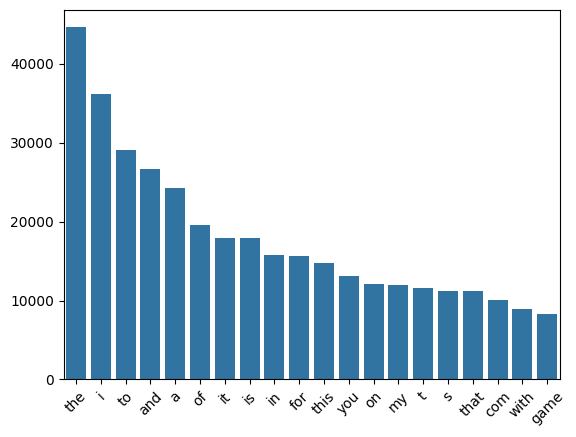

In [ ]:
sns.barplot(x=[token[0] for token in top_tokens], y=[token[1] for token in top_tokens])
plt.xticks(rotation=45)

In [ ]:
import html
def Regex_cleaning(text) :
    text = html.unescape(str(text))
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+', '', text)
    text = re.sub(r'\d+', '', text)
    return text

In [ ]:
df_with_lengths["cleaned_text"] = df_with_lengths["text"].apply(Regex_cleaning)
df["cleaned_text"] = df["text"].apply(Regex_cleaning)

In [ ]:
df_with_lengths[["text","cleaned_text"]]

,text,cleaned_text
0,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
...,...,...
74676,Just realized that the Windows partition of my...,Just realized that the Windows partition of my...
74677,Just realized that my Mac window partition is ...,Just realized that my Mac window partition is ...
74678,Just realized the windows partition of my Mac ...,Just realized the windows partition of my Mac ...
74679,Just realized between the windows partition of...,Just realized between the windows partition of...


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df_with_lengths["Tokenized_Text"] = df_with_lengths.apply(
    lambda row: tokenizer.tokenize(row["cleaned_text"].lower()), axis=1
)
display(df_with_lengths[["cleaned_text", "Tokenized_Text"]].head())

,cleaned_text,Tokenized_Text
0,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
2,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
3,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m..."
4,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ..."


In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("wordnet")
nltk.download("omw-1.4")
stemmer = PorterStemmer()
def stemming (tokens) :
  stems = [stemmer.stem(w) for w in tokens]
  return stems

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_with_lengths["porter_stemmer"] = df_with_lengths["Tokenized_Text"].apply(stemming)

df_with_lengths[["porter_stemmer", "Tokenized_Text"]].head()

,porter_stemmer,Tokenized_Text
0,"[i, am, come, to, the, border, and, i, will, k...","[i, am, coming, to, the, borders, and, i, will..."
1,"[im, get, on, borderland, and, i, will, kill, ...","[im, getting, on, borderlands, and, i, will, k..."
2,"[im, come, on, borderland, and, i, will, murde...","[im, coming, on, borderlands, and, i, will, mu..."
3,"[im, get, on, borderland, and, i, will, murder...","[im, getting, on, borderlands, and, i, will, m..."
4,"[im, get, into, borderland, and, i, can, murde...","[im, getting, into, borderlands, and, i, can, ..."


In [ ]:
import spacy
from tqdm import tqdm
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])
texts = df_with_lengths["cleaned_text"].tolist()
lemmatized = []
for doc in tqdm(nlp.pipe(texts, batch_size=500, n_process=-1), total=len(texts)):
    lemmas = " ".join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop])
    lemmatized.append(lemmas)

df_with_lengths["lemmatized_text"] = lemmatized

df_with_lengths[["lemmatized_text", "Tokenized_Text","porter_stemmer",  "cleaned_text"]].head()

100%|██████████| 74681/74681 [05:02<00:00, 247.09it/s]


,lemmatized_text,Tokenized_Text,porter_stemmer,cleaned_text
0,come border kill,"[i, am, coming, to, the, borders, and, i, will...","[i, am, come, to, the, border, and, i, will, k...",I am coming to the borders and I will kill you...
1,m get borderland kill,"[im, getting, on, borderlands, and, i, will, k...","[im, get, on, borderland, and, i, will, kill, ...",im getting on borderlands and i will kill you all
2,m come borderland murder,"[im, coming, on, borderlands, and, i, will, mu...","[im, come, on, borderland, and, i, will, murde...",im coming on borderlands and i will murder you...
3,m get borderland murder,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",im getting on borderlands and i will murder y...
4,m get borderland murder,"[im, getting, into, borderlands, and, i, can, ...","[im, get, into, borderland, and, i, can, murde...",im getting into borderlands and i can murder y...


In [ ]:
df_with_lengths[["lemmatized_text", "Tokenized_Text","porter_stemmer",  "cleaned_text"]].head()


,lemmatized_text,Tokenized_Text,porter_stemmer,cleaned_text
0,come border kill,"[i, am, coming, to, the, borders, and, i, will...","[i, am, come, to, the, border, and, i, will, k...",I am coming to the borders and I will kill you...
1,m get borderland kill,"[im, getting, on, borderlands, and, i, will, k...","[im, get, on, borderland, and, i, will, kill, ...",im getting on borderlands and i will kill you all
2,m come borderland murder,"[im, coming, on, borderlands, and, i, will, mu...","[im, come, on, borderland, and, i, will, murde...",im coming on borderlands and i will murder you...
3,m get borderland murder,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",im getting on borderlands and i will murder y...
4,m get borderland murder,"[im, getting, into, borderlands, and, i, can, ...","[im, get, into, borderland, and, i, can, murde...",im getting into borderlands and i can murder y...


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
def count_pos_pipe(texts):
    num_verbs, num_nouns, num_adjectives = [], [], []
    for doc in nlp.pipe(texts, batch_size=1000, n_process=-1):
        v = sum(1 for token in doc if token.pos_ == "VERB")
        n = sum(1 for token in doc if token.pos_ == "NOUN")
        a = sum(1 for token in doc if token.pos_ == "ADJ")
        num_verbs.append(v)
        num_nouns.append(n)
        num_adjectives.append(a)

    return pd.DataFrame({
        "num_verbs": num_verbs,
        "num_nouns": num_nouns,
        "num_adjectives": num_adjectives
    })
df_with_lengths[["num_verbs", "num_nouns", "num_adjectives"]] = count_pos_pipe(df_with_lengths["cleaned_text"])

In [ ]:
df_with_lengths[['num_verbs', 'num_nouns','num_adjectives','cleaned_text']]


,num_verbs,num_nouns,num_adjectives,cleaned_text
0,2,1,0,I am coming to the borders and I will kill you...
1,3,1,0,im getting on borderlands and i will kill you all
2,3,1,0,im coming on borderlands and i will murder you...
3,3,1,0,im getting on borderlands and i will murder y...
4,3,1,0,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,2,4,0,Just realized that the Windows partition of my...
74677,2,5,0,Just realized that my Mac window partition is ...
74678,2,5,0,Just realized the windows partition of my Mac ...
74679,1,7,1,Just realized between the windows partition of...


In [ ]:
df_with_lengths.head()


,text,target,length,cleaned_text,Tokenized_Text,porter_stemmer,lemmatized_text,num_verbs,num_nouns,num_adjectives
0,I am coming to the borders and I will kill you...,Positive,51.0,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will...","[i, am, come, to, the, border, and, i, will, k...",come border kill,2,1,0
1,im getting on borderlands and i will kill you ...,Positive,50.0,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k...","[im, get, on, borderland, and, i, will, kill, ...",m get borderland kill,3,1,0
2,im coming on borderlands and i will murder you...,Positive,51.0,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[im, come, on, borderland, and, i, will, murde...",m come borderland murder,3,1,0
3,im getting on borderlands 2 and i will murder ...,Positive,57.0,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",m get borderland murder,3,1,0
4,im getting into borderlands and i can murder y...,Positive,53.0,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ...","[im, get, into, borderland, and, i, can, murde...",m get borderland murder,3,1,0


In [ ]:
df_with_lengths["target"] = df_with_lengths["target"].apply(
    lambda x: 0 if x == "Negative"
    else 1 if x == "Positive"
    else 2 if x == "Neutral"
    else 3
)

In [ ]:
df_with_lengths["target"].value_counts()


,count
target,
0,22542
1,20831
2,18318
3,12990


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from scipy.sparse import hstack

X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW = train_test_split(df_with_lengths[["length","lemmatized_text",	"num_verbs",	"num_nouns",	"num_adjectives"]], df_with_lengths['target'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(min_df=5,max_df=0.9)
X_train_bow = vectorizer.fit_transform(X_train_BOW["lemmatized_text"])
X_test_bow = vectorizer.transform(X_test_BOW["lemmatized_text"])
X_train_bow_dense = X_train_bow.toarray()
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(X_train_bow_dense, columns=feature_names)
X_train_num_bow = X_train_BOW[["length", "num_verbs", "num_nouns", "num_adjectives"]].values
X_test_num_bow = X_test_BOW[["length", "num_verbs", "num_nouns", "num_adjectives"]].values

X_train_final_bow = hstack([X_train_bow, X_train_num_bow])
X_test_final_bow = hstack([X_test_bow, X_test_num_bow])

In [ ]:
import pandas as pd

print(pd.DataFrame(feature_names, columns=["feature_name"]))

     feature_name
0              aa
1             aaa
2           aaron
3              ab
4            abah
...           ...
9153        zprio
9154      zsmitty
9155         zuck
9156   zuckerberg
9157         zuni

[9158 rows x 1 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(df_with_lengths[["length", "lemmatized_text", "num_verbs", "num_nouns", "num_adjectives"]],df_with_lengths['target'],test_size=0.2,random_state=42)
tfidf_vectorizer = TfidfVectorizer(min_df=5,max_df=0.9)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_TFIDF["lemmatized_text"])
X_test_tfidf = tfidf_vectorizer.transform(X_test_TFIDF["lemmatized_text"])
X_train_tfidf_dense=X_train_tfidf.toarray()
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_train_tfidf_dense, columns=feature_names)
X_train_num_tfidf = X_train_TFIDF[["length", "num_verbs", "num_nouns", "num_adjectives"]].values
X_test_num_tfidf = X_test_TFIDF[["length", "num_verbs", "num_nouns", "num_adjectives"]].values
X_train_final_tfidf = hstack([X_train_tfidf, X_train_num_tfidf])
X_test_final_tfidf = hstack([X_test_tfidf, X_test_num_tfidf])
print("Final TFIDF train shape:", X_train_final_tfidf.shape)
print("Final TFIDF test shape:", X_test_final_tfidf.shape)

Final TFIDF train shape: (59744, 9162)
Final TFIDF test shape: (14937, 9162)


In [ ]:
!pip install gensim

from gensim.models import Word2Vec
import numpy as np

sentences = [text.split() for text in df_with_lengths["lemmatized_text"]]
w2v_model = Word2Vec(sentences, vector_size=200, window=5, min_count=5, sg=0, workers=4)

In [ ]:
unique_words = list(w2v_model.wv.key_to_index.keys())
print(unique_words)


['game', 'not', 'play', 'm', 'good', 'like', 'get', 's', 'love', 'time', 'go', 'new', 'look', 'fuck', 'people', 'johnson', 'shit', 'thank', 'great', 'player', 'bad', 'day', 'year', 've', 'know', 'work', 'come', 'want', 'xbox', 'dead', 'rhandlerr', 'facebook', 'think', 'google', 'ps', 'amazon', 'red', 'ban', 'fifa', 'win', 'microsoft', 'guy', 'try', 'fix', 'unk', 'wait', 'watch', 'buy', 'home', 'video', 'today', 'fun', 'gta', 'thing', 'need', 'pubg', 'verizon', 'team', 'live', 'say', 'world', 'help', 'fucking', 'battlefield', 'feel', 'overwatch', 'x', 'stop', 'right', 'big', 'nvidia', 'series', 'man', 'redemption', 'amazing', 't', 'stream', 'start', 'make', 'league', 'happy', 'com', 'v', 'update', 'damn', 'black', 'actually', 'fortnite', 'depot', 'csgo', 'take', 'u', 'kill', 'duty', 'well', 'd', 'k', 'find', 'way', 'to', 'youtube', 'creed', 'see', 'server', 'tell', 'you', 'lose', 'friend', 'let', 'long', 'problem', 'card', 'support', 'free', 'life', 'hearthstone', 'finally', 'check', 'n

In [ ]:
print(len(unique_words))

11691


In [ ]:
def get_avg_embedding(tokens, model):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [ ]:
df_with_lengths["w2v_embedding"] = sentences
df_with_lengths["w2v_embedding"] = df_with_lengths["w2v_embedding"].apply(
    lambda tokens: get_avg_embedding(tokens, w2v_model)
)


print(df_with_lengths[["lemmatized_text", "w2v_embedding"]].head())

            lemmatized_text                                      w2v_embedding
0          come border kill  [0.28917074, 0.14801197, -0.55719465, 0.095723...
1     m get borderland kill  [0.41303372, 0.17927587, -0.70584846, 0.040152...
2  m come borderland murder  [0.2748762, 0.20791155, -0.7803844, 0.1657631,...
3   m get borderland murder  [0.2958757, 0.14455906, -0.6348573, 0.06119043...
4   m get borderland murder  [0.2958757, 0.14455906, -0.6348573, 0.06119043...


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracies = []
precisions = []
recalls = []
f1s = []

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naivebayes_1 =MultinomialNB()
naivebayes_1.fit(X_train_bow, y_train_BOW)

MultinomialNB()

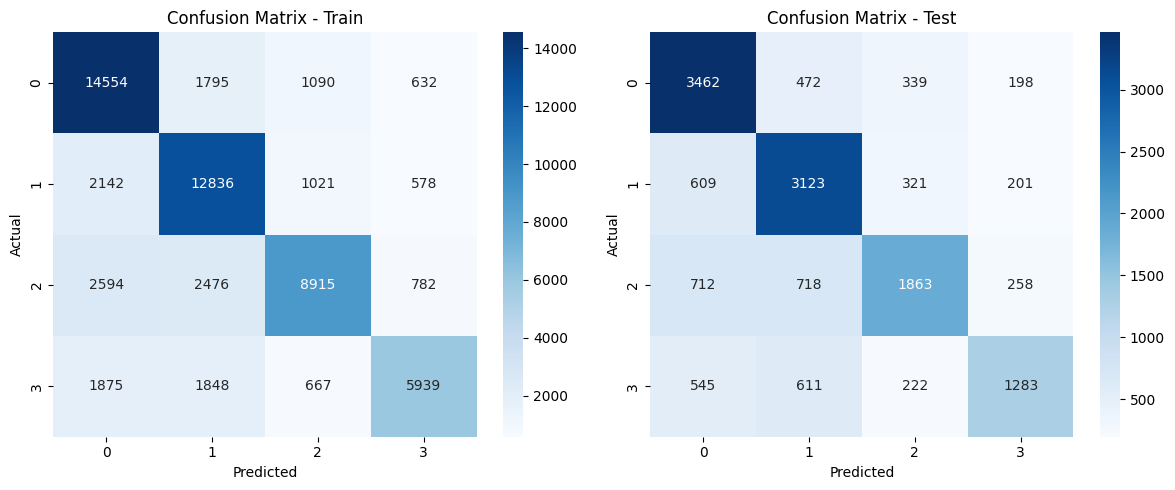

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_bow_text=naivebayes_1.predict(X_test_bow)
y_pred_bow_train=naivebayes_1.predict(X_train_bow)
cm_test = confusion_matrix(y_test_BOW, y_pred_bow_text)
cm_train = confusion_matrix(y_train_BOW, y_pred_bow_train)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_BOW, y_pred_bow_text))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      4471
           1       0.63      0.73      0.68      4254
           2       0.68      0.52      0.59      3551
           3       0.66      0.48      0.56      2661

    accuracy                           0.65     14937
   macro avg       0.66      0.63      0.63     14937
weighted avg       0.65      0.65      0.65     14937

